<a href="https://colab.research.google.com/github/vshiv667/Fashion-MNIST/blob/master/Computer_Vision_for_Fashion_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
from tensorflow import keras

#Simple Computer Vision using Neural Network

## Get Fashion Dataset
TensorFlow contains a set up Fashion Dataset, which has pictures and labels of various clothing items


In [0]:
mnist = tf.keras.datasets.fashion_mnist

The dataset has build-in method to split Training and Testing dataset:

In [0]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Print sample image from dataset:

Item Category: 8
[[  0   0   0   0   0   0   0   0   0   1   0   0  18 107 119 103   9   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  99 155 113  61 118 173 117
    0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0 110 136   0   0   0   0   0 167
  159   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   6   0  72 147   0   0   5   0   2   0   0
  174 118   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   1   5   0   0 174   4   0   4   0   0   0   0   0
    0 204  44   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   8   0 125 128   0   9   0   0   0   0   0   2
    0 107 152   0   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184   9   0   4   0   0   0   0   0   2
    0   0 190   0   0   2   0   0   0   0]
 [  0   0   0   1   0   2   0  73 158   0   0   0   0   1   0   0   0   0
    4   0 157  79   0   3   1   0   0   0]
 [  0   0   2   5   1   0   0 157  98   0   2  

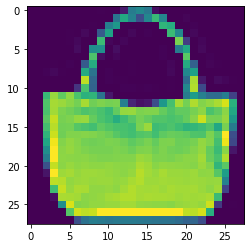

In [0]:
import matplotlib.pyplot as plt
item = 100
plt.imshow(training_images[item])
print("Item Category: {}".format(training_labels[item])) #category is 8 here : bag
print(training_images[item]) # imput feature below represetns a 28 * 28 grayscale image 

## Normalize input data
input is between 0 to 255 as it is in grey scale

In [0]:
training_images  = training_images/255.0
test_images = test_images/255.0

##Build and Train a neural network



In [0]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(), #Flatten 28*28 to a 1*784 feature column
                            tf.keras.layers.Dense(128, activation = tf.nn.relu), #Layer 1 with ReLu activation function giving max(0,val)
                            tf.keras.layers.Dense(10, activation = tf.nn.softmax)]) #Ouput Layer with 10 labels and probabilities of each class using softmax activation fucntion

model.compile(optimizer = tf.optimizers.Adam(), #using adaptive gradient descent
              loss="sparse_categorical_crossentropy", #using sparse as targets in integer format
              metrics=['accuracy']) #set desired metric

model.fit(training_images, training_labels, epochs=5) #fit model and set no. of epochs

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4987 - accuracy: 0.8233
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3803 - accuracy: 0.8619
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3384 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3160 - accuracy: 0.8847
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2974 - accuracy: 0.8909


## Evaluate the performance of the model
 loss: 36.99%
 
 accuracy: 86.97%

In [0]:
model.evaluate(test_images, test_labels) 

313/313 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.8697


[0.36994555592536926, 0.869700014591217]

## Make Prediction

[5.34421904e-03 5.36048101e-05 4.65206220e-04 2.03944539e-04
 3.60445585e-04 8.41743648e-02 7.00659410e-04 7.90212393e-01
 1.21313892e-03 1.17271945e-01]
Test image category: 7


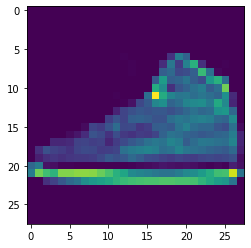

In [0]:
classifications = model.predict(test_images)
print(classifications[45])

print("Test image category: {}".format(test_labels[45])) #category 7: Sneaker
plt.imshow(test_images[45])

[2.1132342e-05 2.1673056e-08 1.5013877e-06 3.5350766e-08 4.5658157e-06
 1.7161107e-02 1.1936325e-05 7.8070223e-02 1.3326171e-05 9.0471607e-01]
Test image category: 9


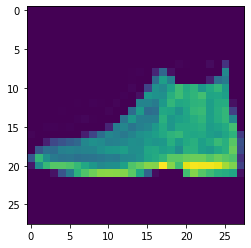

In [0]:
classifications = model.predict(test_images)
print(classifications[0])

print("Test image category: {}".format(test_labels[0])) #category 9: Ankle Boot
plt.imshow(test_images[0])

## Number of layers: Adding one more layer to the model
 loss: 36.26% increases

 accuracy: 87.07% increases

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax )])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4826 - accuracy: 0.8269
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3640 - accuracy: 0.8667
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3318 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3059 - accuracy: 0.8862
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.8707


[0.3626994788646698, 0.8707000017166138]

## Number of Neurons: Adding more neurons to the model
 loss: 34.59% decreases

 accuracy: 87.51% increases

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax )])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels) 

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4857 - accuracy: 0.8275
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3649 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3293 - accuracy: 0.8789
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3044 - accuracy: 0.8880
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3460 - accuracy: 0.8752


[0.34598082304000854, 0.8751999735832214]

## Epoch: Add more epoch in training
 loss: 32.67% decreases

 accuracy: 88.99% increases

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)] )

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)
model.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4988 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3755 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3373 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3148 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2959 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2805 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2681 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2559 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2470 - accuracy: 0.9080
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3267 

[0.3267435133457184, 0.8899000287055969]

## Call Back
Implementing a call back function to stop training the model when model reaches 90% accuracy in training

saves time and computation

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def  on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training")
      self.model.stop_training = True

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, callbacks=[myCallback()])

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4963 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3720 - accuracy: 0.8667
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3355 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3137 - accuracy: 0.8837
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2952 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2800 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2666 - accuracy: 0.9011
Reached 90% accuracy so cancelling training
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9011
